# Covid-19 Data Analysis
### The comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention
MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

#### Read the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline

In [377]:
url = 'https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-04-2021.csv'
df = pd.read_csv(url)
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-05 04:20:43,33.93911,67.709953,60563,2648,53694.0,4221.0,Afghanistan,155.575600,4.372307
1,NaN,NaN,NaN,Albania,2021-05-05 04:20:43,41.15330,20.168300,131327,2402,112626.0,16299.0,Albania,4563.451247,1.829022
2,NaN,NaN,NaN,Algeria,2021-05-05 04:20:43,28.03390,1.659600,122999,3289,85693.0,34017.0,Algeria,280.492758,2.674005
3,NaN,NaN,NaN,Andorra,2021-05-05 04:20:43,42.50630,1.521800,13316,127,12818.0,371.0,Andorra,17234.194008,0.953740
4,NaN,NaN,NaN,Angola,2021-05-05 04:20:43,-11.20270,17.873900,27284,609,24190.0,2485.0,Angola,83.015206,2.232077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,NaN,NaN,Unknown,Ukraine,2021-05-05 04:20:43,NaN,NaN,0,0,0.0,0.0,"Unknown, Ukraine",0.000000,0.000000
4010,NaN,NaN,NaN,Nauru,2021-05-05 04:20:43,-0.52280,166.931500,0,0,0.0,0.0,Nauru,0.000000,0.000000
4011,NaN,NaN,Niue,New Zealand,2021-05-05 04:20:43,-19.05440,-169.867200,0,0,0.0,0.0,"Niue, New Zealand",0.000000,0.000000
4012,NaN,NaN,NaN,Tuvalu,2021-05-05 04:20:43,-7.10950,177.649300,0,0,0.0,0.0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [378]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-05 04:20:43,33.93911,67.709953,60563,2648,53694.0,4221.0,Afghanistan,155.575600,4.372307
1,NaN,NaN,NaN,Albania,2021-05-05 04:20:43,41.15330,20.168300,131327,2402,112626.0,16299.0,Albania,4563.451247,1.829022
2,NaN,NaN,NaN,Algeria,2021-05-05 04:20:43,28.03390,1.659600,122999,3289,85693.0,34017.0,Algeria,280.492758,2.674005
3,NaN,NaN,NaN,Andorra,2021-05-05 04:20:43,42.50630,1.521800,13316,127,12818.0,371.0,Andorra,17234.194008,0.953740
4,NaN,NaN,NaN,Angola,2021-05-05 04:20:43,-11.20270,17.873900,27284,609,24190.0,2485.0,Angola,83.015206,2.232077


#### Show the information of the dataset

In [379]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            737 non-null    float64
 10  Active               737 non-null    float64
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3967 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.6 MB


#### Show the sum of missing values of features in the dataset

In [380]:
df.isnull().sum()

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3277
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      47
dtype: int64

#### Show the number of Confirmed cases by Country

In [381]:
df.groupby('Country_Region')['Confirmed'].sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,60563
1,Albania,131327
2,Algeria,122999
3,Andorra,13316
4,Angola,27284
...,...,...
196,West Bank and Gaza,298921
197,Winter Olympics 2022,0
198,Yemen,6390
199,Zambia,91804


#### Show the number of Deaths by Country

In [382]:
df.groupby('Country_Region')['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,2648
1,Albania,2402
2,Algeria,3289
3,Andorra,127
4,Angola,609
...,...,...
196,West Bank and Gaza,3296
197,Winter Olympics 2022,0
198,Yemen,1240
199,Zambia,1254


#### Show the number of Recovered cases by Country

In [383]:
df.groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,53694.0
1,Albania,112626.0
2,Algeria,85693.0
3,Andorra,12818.0
4,Angola,24190.0
...,...,...
196,West Bank and Gaza,277673.0
197,Winter Olympics 2022,0.0
198,Yemen,2948.0
199,Zambia,90166.0


#### Show the number of Active Cases by Country

In [384]:
df.groupby('Country_Region')['Active'].sum().reset_index()

,Country_Region,Active
0,Afghanistan,4221.0
1,Albania,16299.0
2,Algeria,34017.0
3,Andorra,371.0
4,Angola,2485.0
...,...,...
196,West Bank and Gaza,17952.0
197,Winter Olympics 2022,0.0
198,Yemen,2202.0
199,Zambia,384.0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [385]:
df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

C:\Windows\Temp\ipykernel_10676\3863962569.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,60563,2648,53694.0,4221.0
1,Albania,131327,2402,112626.0,16299.0
2,Algeria,122999,3289,85693.0,34017.0
3,Andorra,13316,127,12818.0,371.0
4,Angola,27284,609,24190.0,2485.0
...,...,...,...,...,...
196,West Bank and Gaza,298921,3296,277673.0,17952.0
197,Winter Olympics 2022,0,0,0.0,0.0
198,Yemen,6390,1240,2948.0,2202.0
199,Zambia,91804,1254,90166.0,384.0


### Show the countries with no recovered cases

In [386]:
data1 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result1 = data1[data1['Recovered']==0][['Country_Region', 'Recovered']]
result1

C:\Windows\Temp\ipykernel_10676\182221357.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Recovered
5,Antarctica,0.0
17,Belgium,0.0
92,Kiribati,0.0
93,"Korea, North",0.0
126,Nauru,0.0
137,Palau,0.0
157,Serbia,0.0
170,Summer Olympics 2020,0.0
172,Sweden,0.0
181,Tonga,0.0


#### Show the countries with no confirmed 

In [387]:
data2 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result2 = data2[data2['Confirmed']==0][['Country_Region', 'Confirmed']]
result2

C:\Windows\Temp\ipykernel_10676\3750638634.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
126,Nauru,0
137,Palau,0
170,Summer Olympics 2020,0
181,Tonga,0
185,Tuvalu,0
197,Winter Olympics 2022,0


#### Show the countries with no deaths

In [388]:
data3 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result3 = data3[data3['Deaths']==0][['Country_Region', 'Deaths']]
result3

C:\Windows\Temp\ipykernel_10676\1251960638.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Deaths
5,Antarctica,0
51,Dominica,0
76,Holy See,0
92,Kiribati,0
93,"Korea, North",0
98,Laos,0
114,Marshall Islands,0
118,Micronesia,0
126,Nauru,0
137,Palau,0


#### Show the Top 10 countries with Confirmed cases

In [390]:
df.groupby('Country_Region')['Last_Update', 'Confirmed','Deaths', 'Recovered'].max().sort_values(by='Confirmed', ascending=False)[:10]

C:\Windows\Temp\ipykernel_10676\3377338425.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Last_Update,Confirmed,Deaths,Recovered
Country_Region,,,,
France,2021-05-05 04:20:43,5633509,104658,309118.0
Turkey,2021-05-05 04:20:43,4929118,41527,4554037.0
India,2021-05-05 04:20:43,4822902,71742,4107092.0
United Kingdom,2021-05-05 04:20:43,3865013,132693,4188.0
Argentina,2021-05-05 04:20:43,3047417,65202,2717458.0
Brazil,2021-05-05 04:20:43,2941980,98021,2606926.0
Poland,2021-05-05 04:20:43,2808052,68133,2536931.0
Iran,2021-05-05 04:20:43,2575737,73219,2022586.0
Indonesia,2021-05-05 04:20:43,1686373,46137,1541149.0


#### Show the Top 10 Countries with Active cases

In [391]:
df.groupby('Country_Region')['Last_Update', 'Confirmed','Deaths', 'Recovered', 'Active'].max().sort_values(by='Active', ascending=False)[:10]

C:\Windows\Temp\ipykernel_10676\2592060037.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
France,2021-05-05 04:20:43,5633509,104658,309118.0,5219733.0
United Kingdom,2021-05-05 04:20:43,3865013,132693,4188.0,3752827.0
Peru,2021-05-05 04:20:43,836501,79353,1761205.0,757148.0
Serbia,2021-05-05 04:20:43,694473,6456,0.0,688017.0
India,2021-05-05 04:20:43,4822902,71742,4107092.0,644068.0
Spain,2021-05-05 04:20:43,686681,15016,40736.0,630929.0
Mexico,2021-05-05 04:20:43,643067,34068,1875211.0,610417.0
Slovakia,2021-05-05 04:20:43,757806,11855,255300.0,490651.0
Iran,2021-05-05 04:20:43,2575737,73219,2022586.0,479932.0


#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [288]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Country_Region'>

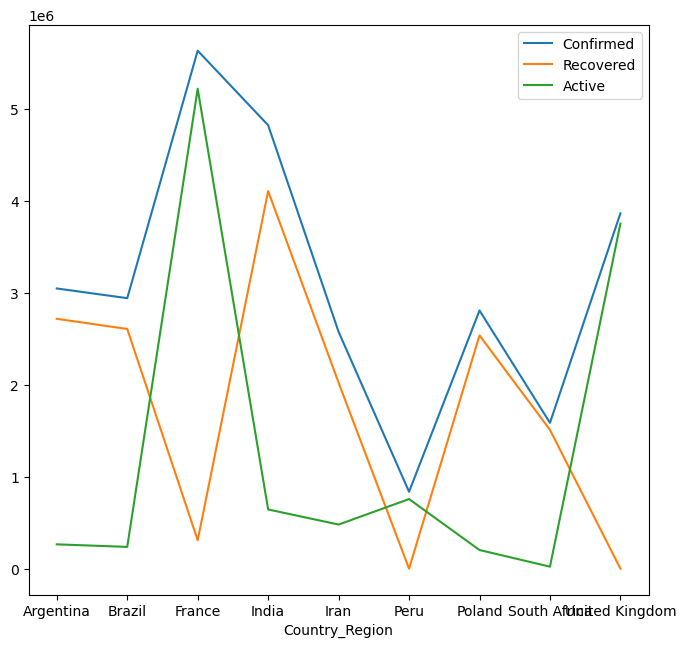

In [392]:
df1=df.loc[df['Deaths']>50000]
df1.plot(x='Country_Region', y=['Confirmed', 'Recovered', 'Active'], kind='line')

### Plot Province/State wise Deaths in USA

In [250]:
import plotly.express as px

In [393]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2021.csv')
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [394]:
covid_data1=covid_data[covid_data['Country_Region'] == "US"]
covid_data1.head()
covid_data1=covid_data1.groupby(by='Province_State').sum()
covid_data1= covid_data1.reset_index()
covid_data1= covid_data1.sort_values(by='Deaths',ascending= False)
fig = px.bar(covid_data1, x='Province_State', y='Deaths',title="State wise Deaths in USA",text_auto=True)
fig.show()

### Plot Province/State Wise Active Cases in USA

In [395]:
covid_data2=covid_data[covid_data['Country_Region'] == "US"]
covid_data2.head()
covid_data2=covid_data2.groupby(by='Province_State').sum()
covid_data2= covid_data2.reset_index()
covid_data2= covid_data2.sort_values(by='Active',ascending= False)
fig = px.bar(covid_data2, x='Province_State', y='Active',title="State Wise Active Cases in USA",text_auto=True)
fig.show()

### Plot Province/State Wise Confirmed cases in USA

In [396]:
covid_data3=covid_data[covid_data['Country_Region'] == "US"]
covid_data3.head()
covid_data3=covid_data3.groupby(by='Province_State').sum()
covid_data3= covid_data3.reset_index()
covid_data3= covid_data3.sort_values(by='Confirmed',ascending= False)
fig = px.bar(covid_data3, x='Province_State', y='Confirmed',title="State Wise Confirmed cases in USA",text_auto=True)
fig.show()

### Plot Worldwide Confirmed Cases over time

In [397]:
import plotly.express as px
import plotly.io as pio

In [398]:
covid_data_= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid_data_.columns
covid_data_=covid_data_.groupby('Country/Region').sum()
covid_data_= covid_data_.reset_index()
covid_data_=covid_data_.sort_values(by='1/22/23',ascending= False)
covid_data1_=covid_data_.head(100)
fig =px.bar(covid_data_ , x='Country/Region',y=['1/22/23', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/13/23', '1/14/23', '1/15/23', '1/16/23', '1/17/23', '1/18/23',
       '1/19/23', '1/20/23', '1/21/23', '1/22/23'],title='Worldwide Confirmed Cases over time',text_auto=True)
fig.show()